In [17]:
from google.colab import files
upload = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [0]:
#유클리드 거리
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(tdm[0], tdm[1])

In [10]:
from sklearn.externals import joblib
import pandas as pd

def get_nouns():
  pass

with open('ai_news.pkl','rb') as f:
  data = joblib.load(f)

locals().update(data)



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
#유클리드 거리
from sklearn.metrics.pairwise import euclidean_distances


array([[6.55743852]])

In [12]:
import numpy as np
dist = euclidean_distances(tdm[0], tdm[1:])
np.argmin(dist) +1

357

In [0]:
article = pandas.read_csv('인공지능 관련 뉴스메타데이터(2013.01.01-2017.08.31).CSV',
                          encoding='cp949', engine='python')
print(article.loc[0,'본문'])
print(article.loc[357,'본문'])

In [14]:
#코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tdm[0], tdm[1])

array([[0.04472136]])

In [15]:
sim = cosine_similarity(tdm[0], tdm[1:])
np.argmax(sim) + 1

357

In [0]:
#0번 기사와 가장 유사도가 높은 문서는 위의 숫자 357
article.loc[357, '본문']

In [18]:
#문서 클러스터링
with open('amazon.pkl','rb') as f:
  data = joblib.load(f)

locals().update(data)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
df = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header=None)

In [20]:
#스펙트럴 클러스터링
from sklearn.cluster import SpectralClustering
cl = SpectralClustering(n_clusters=4, random_state=1234)
labels = cl.fit_predict(tdm[:100])
print(labels)

[1 1 3 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1
 1 3 2 3 2 1 1 1 1 1 1 1 0 1 1 1 1 2 1 0 3 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 1
 1 2 1 3 2 1 1 1 1 1 3 1 3 1 2 1 1 1 3 1 1 1 1 2 1 0]


In [21]:
from operator import itemgetter
words = vectorizer.get_feature_names()

def top10(labels):
    freq_words = []
    for i in range(4):
        count = tdm[labels == i, :].sum(axis=0)
        ws = [w for w, n in sorted(zip(words, count.flat), key=itemgetter(1), reverse=True)[:10]]
        freq_words.append(ws)

    return pd.DataFrame(freq_words)

top10(labels)

,0,1,2,3,4,5,6,7,8,9
0,disappointed,decision,battery,10,100,11,12,13,15,15g
1,phone,battery,good,ve,time,right,money,doesn,use,headsets
2,product,love,worthless,impressed,thing,waaay,sensitive,big,handy,cheaper
3,great,works,worked,item,phone,choice,jawbone,mic,quality,situations


In [22]:
#코사인 유사도를 바탕으로 클러스터링
from sklearn.metrics.pairwise import cosine_similarity
cl_cos = SpectralClustering(n_clusters=4, affinity=cosine_similarity, random_state=1234)
labels_cos = cl_cos.fit_predict(tdm[:100])
top10(labels_cos)


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,0,1,2,3,4,5,6,7,8,9
0,battery,disappointed,days,decision,runs,right,problem,bought,quickly,buy
1,great,phone,works,good,quality,use,case,ve,mic,doesn
2,product,love,money,features,waste,thing,worthless,impressed,waaay,want
3,way,ear,wear,comfortable,holds,unless,clip,wonder,plug,music


In [28]:
#KMeans 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=1234)
labels_km = km.fit_predict(tdm)
top10(labels_km)


,0,1,2,3,4,5,6,7,8,9
0,good,headset,quality,battery,sound,use,ear,recommend,work,service
1,phone,ve,cell,best,like,worst,new,does,did,buy
2,great,works,phone,price,deal,item,device,sound,worked,battery
3,product,great,excellent,price,good,recommend,buy,don,happy,really


In [27]:
from sklearn.preprocessing import Normalizer
nom = Normalizer(copy=False)
pos = nom.fit_transform(tdm)
km = KMeans(n_clusters=4, random_state=1234)
labels_nom = km.fit_predict(tdm)
top10(labels_nom)

,0,1,2,3,4,5,6,7,8,9
0,good,headset,quality,battery,sound,use,ear,recommend,work,service
1,phone,ve,cell,best,like,worst,new,does,did,buy
2,great,works,phone,price,deal,item,device,sound,worked,battery
3,product,great,excellent,price,good,recommend,buy,don,happy,really


In [29]:
#LSA (잠재 의미 분석)
tdm.shape

(1000, 1000)

In [0]:
from sklearn.decomposition import TruncatedSVD
#특이값 분해로 차원 축소
svd = TruncatedSVD(n_components=30) #축소할 차원 수

In [39]:
#svd.fit_transform()에 tdm을 넘겨줘서 차원을 축소한다.
pos = svd.fit_transform(tdm)
pos.shape

(1000, 30)

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

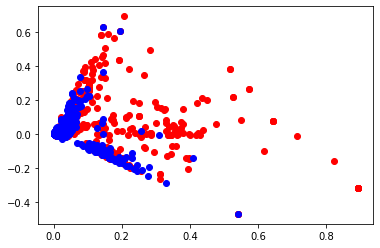

In [33]:
dim1 = 0
dim2 = 1
plt.plot(pos[sentiment == 1, dim1], pos[sentiment == 1, dim2], 'ro')  # 긍정적인 코멘트 (빨간색)
plt.plot(pos[sentiment == 0, dim1], pos[sentiment == 0, dim2], 'bo')  # 부정적인 코멘트 (파란색)

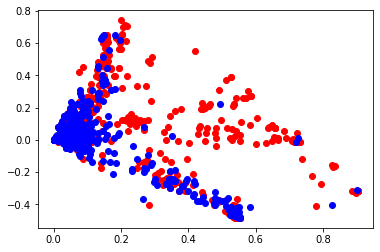

In [34]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer(copy=False)
pos2 = norm.fit_transform(pos)
dim1 = 0
dim2 = 1
plt.plot(pos2[sentiment == 1, dim1], pos2[sentiment == 1, dim2], 'ro')  # 긍정적인 코멘트 (빨간색)
plt.plot(pos2[sentiment == 0, dim1], pos2[sentiment == 0, dim2], 'bo')  # 부정적인 코멘트 (파란색)

In [35]:
#파이프라인 만들기
from sklearn.pipeline import make_pipeline
lsa = make_pipeline(svd, norm)
lsa.transform(tdm)

array([[ 0.07836849,  0.0279486 ,  0.02310924, ...,  0.27758617,
         0.18269635,  0.71269153],
       [ 0.14566133,  0.45902867,  0.27704249, ...,  0.00598827,
         0.04965643, -0.10639147],
       [ 0.71794841, -0.01378078, -0.52331615, ...,  0.01107483,
        -0.04457857, -0.06192957],
       ...,
       [ 0.0679093 ,  0.03914935,  0.02769027, ..., -0.15853669,
         0.29613757, -0.05629534],
       [ 0.07056649,  0.01574286,  0.09374321, ..., -0.31737757,
        -0.23152876,  0.22020626],
       [ 0.06319896,  0.00769235,  0.03622326, ..., -0.1273838 ,
        -0.067629  ,  0.33296666]])

In [53]:
#LDA 잠재 디리클레 하당
#.get_feature_names() 을 통해 각 차원에 해당하는 단어 목록을 가져오자.
with open('ai_news.pkl','rb') as f:
  data = joblib.load(f)

print(data)
locals().update(data)

words = vectorizer.get_feature_names()
#print(words)
word_dict = dict(enumerate(words))

{'vectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function get_nouns at 0x7f1fc61ff488>,
                vocabulary=None), 'tdm': <47917x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 914010 stored elements in Compressed Sparse Row format>}


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [44]:
print(word_dict[0])
print(word_dict[100])

.co
과학부


In [45]:
#tdm to gensim
from gensim.matutils import Sparse2Corpus
corpus = Sparse2Corpus(tdm.T)
corpus

In [0]:
#https://coredottoday.github.io/2018/09/17/%EB%AA%A8%EB%8D%B8-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9D/

In [46]:
from gensim.models.ldamodel import LdaModel
lda = LdaModel(corpus=corpus, #corpus
               num_topics=100, #
               passes=3, #계산횟수 기본값 1
               iterations=100, #계산횟수 50 기본값
               id2word=word_dict,
               random_state=123) #계산 랜덤부분 고정시켜 계산결과를 일정하게

lda.show_topic(0)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[('문제', 0.294138),
 ('해결', 0.14847381),
 ('특징', 0.10860987),
 ('편리', 0.089724414),
 ('자유', 0.07351054),
 ('설정', 0.06691065),
 ('메시지', 0.061050657),
 ('판교', 0.042636957),
 ('마음', 0.041259587),
 ('인공지능', 0.03351779)]

In [47]:
lda.show_topic(2)

[('운영', 0.2148323),
 ('공개', 0.20752405),
 ('등장', 0.13203163),
 ('보호', 0.07796013),
 ('시리즈', 0.07460456),
 ('인공지능', 0.051795576),
 ('체제', 0.04121668),
 ('대출', 0.040621396),
 ('작품', 0.030166924),
 ('당시', 0.030089743)]

In [48]:
lda.show_topic(3)

[('인공지능', 0.31729183),
 ('인간', 0.19650847),
 ('능력', 0.051983822),
 ('생각', 0.03463213),
 ('발달', 0.030194754),
 ('사람', 0.022058388),
 ('컴퓨터', 0.0218302),
 ('기술', 0.017335868),
 ('인류', 0.01571043),
 ('지능', 0.015589345)]

In [55]:
#문서 주제 확인
row = tdm[0]
doc = list(zip(row.indices, row.data))
doc


[(901, 1),
 (996, 1),
 (640, 1),
 (564, 1),
 (992, 1),
 (523, 1),
 (32, 1),
 (679, 1),
 (562, 1),
 (52, 2),
 (468, 1),
 (763, 2),
 (540, 1),
 (780, 1)]

In [56]:
doc_words = [(words[i], n) for i, n in doc]
doc_words

[('특징', 1),
 ('효과', 1),
 ('인공지능', 1),
 ('완성', 1),
 ('활용', 1),
 ('엔진', 1),
 ('개발', 1),
 ('자체', 1),
 ('올해', 1),
 ('게임', 2),
 ('시작', 1),
 ('준비', 2),
 ('열풍', 1),
 ('지난해', 1)]

In [57]:
#토픽 비율 확인
lda.get_document_topics(doc)

[(0, 0.068981856),
 (12, 0.28601968),
 (24, 0.06028754),
 (26, 0.073085986),
 (33, 0.11706411),
 (45, 0.06848155),
 (80, 0.15148912),
 (99, 0.12047253)]

In [0]:
lda.save('lda_test.lda')
lda2 - LdaModel.load('lda_test.lda') 